<a href="https://colab.research.google.com/github/Sameer3814/Portfolio-Project/blob/main/Predicting_Road_Clearance_Time_After_an_Accident.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Predicting Road Clearance Time After an Accident**

In this project, I developed a machine learning model to predict the time it takes to clear roads after an accident. The dataset included various factors such as weather conditions, crash severity, vehicle damage ratings, and demographics.

**Key Steps Taken:**

✅ **Data Preprocessing**: Handled missing values, encoded categorical variables, removed irrelevant columns, and created meaningful feature bins.

✅ **Feature Engineering & Selection:** Transformed time-related variables, applied one-hot encoding, and selected the most relevant features.

✅ **Model Development:** Trained a Random Forest Regressor, fine-tuned hyperparameters, and evaluated the model’s performance.

✅ **Results:** Achieved an R² score of 84%, significantly improving prediction accuracy.

This project showcases my data preprocessing, feature engineering, and machine learning skills, demonstrating my ability to build impactful predictive models.

# **Data preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# To display all columns when viewing the DataFrame
pd.set_option("display.max_columns", None)

# For a consistent style for visualizations
sns.set_style("whitegrid")

In [2]:
import os

# List files in the current directory
print("Files in local memory:", os.listdir())

Files in local memory: ['.config', 'Regression_test.csv', 'Regression_train.csv', 'sample_data']


In [3]:
# Loading the datasets
df_train = pd.read_csv("Regression_train.csv")
df_test = pd.read_csv("Regression_test.csv")

print("Training Data:")
print(df_train.head())

print("\nTest Data:")
print(df_test.head())


Training Data:
   Unnamed: 0    Crash ID Crash Date       Crash Severity Crash Time  \
0           0         NaN   5/1/2023      N - NOT INJURED      16:04   
1           1  19524300.0   5/1/2023                  NaN      17:49   
2           2  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   
3           3  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   
4           4  19524300.0   5/1/2023  C - POSSIBLE INJURY      17:49   

  Day of Week Nearest Trauma Center Distance Time Arrived Time Notified  \
0         NaN                        No Data      No Data       No Data   
1      MONDAY                          5.916        17:59         17:52   
2      MONDAY                          5.916        17:59         17:52   
3      MONDAY                          5.916          NaN         17:52   
4      MONDAY                          5.916        17:59         17:52   

  Time Roadway Cleared Weather Condition Autonomous Level Engaged  \
0                16:26         1

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5259 non-null   object 
 4   Crash Time                          5376 non-null   object 
 5   Day of Week                         5264 non-null   object 
 6   Nearest Trauma Center Distance      5266 non-null   object 
 7   Time Arrived                        5283 non-null   object 
 8   Time Notified                       5264 non-null   object 
 9   Time Roadway Cleared                5376 non-null   object 
 10  Weather Condition                   5376 non-null   object 
 11  Autonomous Level Engaged            5273 no

In [5]:
df_train.isna().sum()

,0
Unnamed: 0,0
Crash ID,110
Crash Date,109
Crash Severity,117
Crash Time,0
Day of Week,112
Nearest Trauma Center Distance,110
Time Arrived,93
Time Notified,112
Time Roadway Cleared,0


In [6]:
# Filtering the rows where 'Crash ID' is missing
missing_crash_id = df_train[df_train['Crash ID'].isnull()]

print(missing_crash_id)

      Unnamed: 0  Crash ID Crash Date              Crash Severity Crash Time  \
0              0       NaN   5/1/2023             N - NOT INJURED      16:04   
67            67       NaN   5/5/2023             N - NOT INJURED      16:30   
168          168       NaN  5/11/2023             N - NOT INJURED      16:43   
241          241       NaN  5/13/2023  B - SUSPECTED MINOR INJURY      01:55   
369          369       NaN  5/19/2023             N - NOT INJURED      15:53   
...          ...       ...        ...                         ...        ...   
5167        5167       NaN  2/15/2024             N - NOT INJURED      06:40   
5213        5213       NaN  2/19/2024             N - NOT INJURED      11:36   
5243        5243       NaN  2/21/2024  B - SUSPECTED MINOR INJURY      07:35   
5322        5322       NaN  2/26/2024             N - NOT INJURED      08:40   
5344        5344       NaN  2/27/2024             N - NOT INJURED      16:55   

     Day of Week Nearest Trauma Center 

In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5259 non-null   object 
 4   Crash Time                          5376 non-null   object 
 5   Day of Week                         5264 non-null   object 
 6   Nearest Trauma Center Distance      5266 non-null   object 
 7   Time Arrived                        5283 non-null   object 
 8   Time Notified                       5264 non-null   object 
 9   Time Roadway Cleared                5376 non-null   object 
 10  Weather Condition                   5376 non-null   object 
 11  Autonomous Level Engaged            5273 no

In [8]:
df_train['Crash Severity'].value_counts()

,count
Crash Severity,
N - NOT INJURED,3459
B - SUSPECTED MINOR INJURY,796
C - POSSIBLE INJURY,733
99 - UNKNOWN,149
A - SUSPECTED SERIOUS INJURY,101
K - FATAL INJURY,21


In [9]:
mapping = {
    'N - NOT INJURED': 0,
    'B - SUSPECTED MINOR INJURY': 1,
    'C - POSSIBLE INJURY': 2,
    'A - SUSPECTED SERIOUS INJURY': 3,
    'K - FATAL INJURY': 4
}
df_train['Crash Severity'].replace('99 - UNKNOWN', pd.NA, inplace=True)

df_train['Crash Severity'].isna().sum()

266

In [10]:
# Imputing the missing values with mode (most common severity)
most_common = df_train['Crash Severity'].mode()[0]
df_train['Crash Severity'].fillna(most_common, inplace=True)

In [11]:
df_train['Crash Severity'].isna().sum()

0

In [12]:
df_train['Crash Severity'] = df_train['Crash Severity'].map(mapping)

In [13]:
df_train['Crash Severity'].value_counts()

,count
Crash Severity,
0,3725
1,796
2,733
3,101
4,21


In [14]:
df_train['Day of Week'].value_counts()

,count
Day of Week,
FRIDAY,961
THURSDAY,833
TUESDAY,774
MONDAY,765
WEDNESDAY,754
SATURDAY,617
SUNDAY,560


In [15]:
#We are replacing null values with FRIDAY since it appears the most number of times.
df_train['Day of Week'].fillna('FRIDAY', inplace=True)

In [16]:
df_train['Day of Week'].isna().sum()

0

In [17]:
import numpy as np

# Mapping days to numbers (Monday = 0, ..., Sunday = 6)
day_mapping = {
    'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3,
    'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6
}

# Applying mapping
df_train['Day of Week Num'] = df_train['Day of Week'].map(day_mapping)

# Applying sine and cosine transformation
df_train['Day_Sin'] = np.sin(2 * np.pi * df_train['Day of Week Num'] / 7)
df_train['Day_Cos'] = np.cos(2 * np.pi * df_train['Day of Week Num'] / 7)

# Dropping the original "Day of Week" column
df_train.drop(columns=['Day of Week', 'Day of Week Num'], inplace=True)


Here I applied sine and cosine transformation because I wanted the model to understand the cyclical nature of the column ***'Day of Week'***

In [18]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 21 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          5376 non-null   int64  
 1   Crash ID                            5266 non-null   float64
 2   Crash Date                          5267 non-null   object 
 3   Crash Severity                      5376 non-null   int64  
 4   Crash Time                          5376 non-null   object 
 5   Nearest Trauma Center Distance      5266 non-null   object 
 6   Time Arrived                        5283 non-null   object 
 7   Time Notified                       5264 non-null   object 
 8   Time Roadway Cleared                5376 non-null   object 
 9   Weather Condition                   5376 non-null   object 
 10  Autonomous Level Engaged            5273 non-null   object 
 11  Autonomous Unit - Reported          5274 no

In [19]:
df_train['Nearest Trauma Center Distance'].isna().sum()

110

In [20]:
df_train['Nearest Trauma Center Distance'].value_counts()

,count
Nearest Trauma Center Distance,
No Data,4538
5.916,19
2.491,12
4.489,11
4.354,10
...,...
4.62,1
0.988,1
1.354,1


In [21]:
print((df_train['Nearest Trauma Center Distance'] == 'No Data').sum()/len(df_train)*100)

84.41220238095238


We'll drop the Nearest Trauma Center Distance column since it has almost 84% 'No Data' values.

In [22]:
df_train['Time Arrived'].value_counts()

,count
Time Arrived,
No Data,4451
16:20,11
15:50,10
13:13,10
13:39,10
...,...
23:40,1
00:01,1
11:32,1


We'll also drop the **'Time Arrived'** column since most of it's records contain 'No Data' value.

In [23]:
df_train['Time Notified'].value_counts()

,count
Time Notified,
No Data,4432
16:56,11
16:20,10
08:59,9
13:03,9
...,...
20:06,1
03:20,1
08:15,1


In [24]:
df_train['Time Notified'].isna().sum()

112

We'll drop the 'Time Notified' Column as well.

In [25]:
# Converting 'Crash Time' to datetime type
df_train['Crash Time'] = pd.to_datetime(df_train['Crash Time'])
time_format = pd.to_datetime('00:00:00')
df_train['Crash Time'] = (df_train['Crash Time'] - time_format).dt.total_seconds() / 60

# Converting 'Time Roadway Cleared' to datetime type
df_train['Time Roadway Cleared'] = pd.to_datetime(df_train['Time Roadway Cleared'])
time_format = pd.to_datetime('00:00:00')
df_train['Time Roadway Cleared'] = (df_train['Time Roadway Cleared'] - time_format).dt.total_seconds() / 60

In [26]:
#Calculating 'y' variable
df_train['y'] = df_train['Time Roadway Cleared'] - df_train['Crash Time']

In [27]:
df_train.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Crash Time,Nearest Trauma Center Distance,Time Arrived,Time Notified,Time Roadway Cleared,Weather Condition,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Day_Sin,Day_Cos,y
0,0,NaN,5/1/2023,0,964.0,No Data,No Data,No Data,986.0,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019,19,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,-0.433884,-0.900969,22.0
1,1,19524300.0,5/1/2023,0,1069.0,5.916,17:59,17:52,1148.0,1 - CLEAR,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2006,37,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0.000000,1.000000,79.0
2,2,19524300.0,5/1/2023,2,1069.0,5.916,17:59,17:52,1148.0,1 - CLEAR,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2008,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0.000000,1.000000,79.0
3,3,19524300.0,5/1/2023,2,1069.0,5.916,NaN,17:52,1148.0,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,23,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0.000000,1.000000,79.0
4,4,19524300.0,5/1/2023,2,1069.0,5.916,17:59,17:52,1148.0,1 - CLEAR,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018,24,No Data,No Data,W - WHITE,1 - MALE,0.000000,1.000000,79.0


In [28]:
# Making sure that 'Vehicle Model Year' and 'Person Age' are numeric, coercing errors to NaN
df_train['Vehicle Model Year'] = pd.to_numeric(df_train['Vehicle Model Year'], errors='coerce')
df_train['Person Age'] = pd.to_numeric(df_train['Person Age'], errors='coerce')

In [29]:
import pandas as pd

# Defining the bin edges for Vehicle Model Year
bins = [2000, 2010, 2020, 2025]
labels = ['2000-2010', '2011-2020', '2021-present']

# Creating a new column for binned vehicle model year
df_train['Vehicle Model Year Binned'] = pd.cut(df_train['Vehicle Model Year'], bins=bins, labels=labels, right=False)

# Function to get the first mode of a series (for categorical columns)
def get_mode(series):
    return series.mode()[0] if not series.mode().empty else None

# Aggregating the data by 'Crash ID' and using the binned vehicle model year
df_aggregated = df_train.groupby('Crash ID').agg({
    'Crash Severity': get_mode,  # Mode for categorical features
    'Time Roadway Cleared': 'mean',  # Mean for continuous values
    'Weather Condition': get_mode,  # Mode for weather condition
    'Autonomous Level Engaged': get_mode,  # Mode for autonomous level
    'Vehicle Model Year Binned': get_mode,  # Mode for binned vehicle model years
    'Person Age': 'mean',  # Mean for age
    'Person Gender': get_mode  # Mode for gender
}).reset_index()

print(df_aggregated.head())



     Crash ID  Crash Severity  Time Roadway Cleared Weather Condition  \
0  19522283.0               1                 774.0         1 - CLEAR   
1  19523532.0               0                 647.0         1 - CLEAR   
2  19524300.0               2                1148.0         1 - CLEAR   
3  19524604.0               0                 539.0         1 - CLEAR   
4  19524612.0               0                 954.0         1 - CLEAR   

  Autonomous Level Engaged Vehicle Model Year Binned  Person Age Person Gender  
0        0 - NO AUTOMATION                 2011-2020       32.75      1 - MALE  
1        0 - NO AUTOMATION                 2011-2020       47.00      1 - MALE  
2        0 - NO AUTOMATION                 2011-2020       36.25      1 - MALE  
3        0 - NO AUTOMATION                 2011-2020       54.00      1 - MALE  
4        0 - NO AUTOMATION                 2011-2020       19.00    2 - FEMALE  


In [30]:
df_train['Vehicle Model Year Binned'].value_counts()

,count
Vehicle Model Year Binned,
2011-2020,2730
2021-present,1180
2000-2010,954


In [31]:
# One-Hot Encoding for 'Vehicle Model Year Binned'
df_train = pd.get_dummies(df_train, columns=['Vehicle Model Year Binned'], drop_first=True)

print(df_train.head())

   Unnamed: 0    Crash ID Crash Date  Crash Severity  Crash Time  \
0           0         NaN   5/1/2023               0       964.0   
1           1  19524300.0   5/1/2023               0      1069.0   
2           2  19524300.0   5/1/2023               2      1069.0   
3           3  19524300.0   5/1/2023               2      1069.0   
4           4  19524300.0   5/1/2023               2      1069.0   

  Nearest Trauma Center Distance Time Arrived Time Notified  \
0                        No Data      No Data       No Data   
1                          5.916        17:59         17:52   
2                          5.916        17:59         17:52   
3                          5.916          NaN         17:52   
4                          5.916        17:59         17:52   

   Time Roadway Cleared Weather Condition Autonomous Level Engaged  \
0                 986.0         1 - CLEAR        0 - NO AUTOMATION   
1                1148.0         1 - CLEAR        0 - NO AUTOMATION   
2 

In [32]:
df_train.shape

(5376, 24)

In [33]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5376 non-null   int64  
 1   Crash ID                                5266 non-null   float64
 2   Crash Date                              5267 non-null   object 
 3   Crash Severity                          5376 non-null   int64  
 4   Crash Time                              5376 non-null   float64
 5   Nearest Trauma Center Distance          5266 non-null   object 
 6   Time Arrived                            5283 non-null   object 
 7   Time Notified                           5264 non-null   object 
 8   Time Roadway Cleared                    5376 non-null   float64
 9   Weather Condition                       5376 non-null   object 
 10  Autonomous Level Engaged                5273 non-null   obje

In [34]:
df_train['Weather Condition'].value_counts()

,count
Weather Condition,
1 - CLEAR,4304
2 - CLOUDY,531
3 - RAIN,394
Unknown,49
No Data,46
99 - UNKNOWN,27
6 - FOG,11
5 - SNOW,6
4 - SLEET/HAIL,4


In [35]:
# Replacing 'Other' and 'No Data' values in 'Weather Condition' with mode
mode_weather_condition = df_train['Weather Condition'].mode()[0]

# Replacing '98 - OTHER (EXPLAIN IN NARRATIVE)' and 'No Data' with the mode
df_train['Weather Condition'].replace(['98 - OTHER (EXPLAIN IN NARRATIVE)', 'No Data'], mode_weather_condition, inplace=True)

# Handling 'Unknown' values by replacing them with the mode as well
df_train['Weather Condition'].replace('99 - UNKNOWN', mode_weather_condition, inplace=True)

# One-hot encoding for the 'Weather Condition' column
df_train = pd.get_dummies(df_train, columns=['Weather Condition'], drop_first=True)

df_train.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Crash Time,Nearest Trauma Center Distance,Time Arrived,Time Notified,Time Roadway Cleared,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Day_Sin,Day_Cos,y,Vehicle Model Year Binned_2011-2020,Vehicle Model Year Binned_2021-present,Weather Condition_2 - CLOUDY,Weather Condition_3 - RAIN,Weather Condition_4 - SLEET/HAIL,Weather Condition_5 - SNOW,Weather Condition_6 - FOG,Weather Condition_Unknown
0,0,NaN,5/1/2023,0,964.0,No Data,No Data,No Data,986.0,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019.0,19.0,No Data,97 - NOT APPLICABLE,H - HISPANIC,1 - MALE,-0.433884,-0.900969,22.0,True,False,False,False,False,False,False,False
1,1,19524300.0,5/1/2023,0,1069.0,5.916,17:59,17:52,1148.0,0 - NO AUTOMATION,2 - NO,4 - DAMAGED 4,2006.0,37.0,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0.000000,1.000000,79.0,False,False,False,False,False,False,False,False
2,2,19524300.0,5/1/2023,2,1069.0,5.916,17:59,17:52,1148.0,0 - NO AUTOMATION,2 - NO,1 - DAMAGED 1 MINIMUM,2008.0,NaN,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0.000000,1.000000,79.0,False,False,False,False,False,False,False,False
3,3,19524300.0,5/1/2023,2,1069.0,5.916,NaN,17:52,1148.0,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018.0,23.0,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0.000000,1.000000,79.0,True,False,False,False,False,False,False,False
4,4,19524300.0,5/1/2023,2,1069.0,5.916,17:59,17:52,1148.0,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2018.0,24.0,No Data,No Data,W - WHITE,1 - MALE,0.000000,1.000000,79.0,True,False,False,False,False,False,False,False


In [36]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5376 non-null   int64  
 1   Crash ID                                5266 non-null   float64
 2   Crash Date                              5267 non-null   object 
 3   Crash Severity                          5376 non-null   int64  
 4   Crash Time                              5376 non-null   float64
 5   Nearest Trauma Center Distance          5266 non-null   object 
 6   Time Arrived                            5283 non-null   object 
 7   Time Notified                           5264 non-null   object 
 8   Time Roadway Cleared                    5376 non-null   float64
 9   Autonomous Level Engaged                5273 non-null   object 
 10  Autonomous Unit - Reported              5274 non-null   obje

In [37]:
df_train['Weather Condition_Unknown'].value_counts()

,count
Weather Condition_Unknown,
False,5327
True,49


In [38]:
df_train['Vehicle Damage Rating 1 - Severity'].value_counts()

,count
Vehicle Damage Rating 1 - Severity,
2 - DAMAGED 2,1722
1 - DAMAGED 1 MINIMUM,1339
3 - DAMAGED 3,1141
4 - DAMAGED 4,418
No Data,375
5 - DAMAGED 5,114
0 - NO DAMAGE,104
6 - DAMAGED 6,39
7 - DAMAGED 7 HIGHEST,17


In [39]:
damage_mapping = {
    '0 - NO DAMAGE': 0,
    '1 - DAMAGED 1 MINIMUM': 1,
    '2 - DAMAGED 2': 2,
    '3 - DAMAGED 3': 3,
    '4 - DAMAGED 4': 4,
    '5 - DAMAGED 5': 5,
    '6 - DAMAGED 6': 6,
    '7 - DAMAGED 7 HIGHEST': 7,
    'No Data': np.nan
}

df_train['Vehicle Damage Rating 1 - Severity'] = df_train['Vehicle Damage Rating 1 - Severity'].map(damage_mapping)

# Replacing NaN with the mode:
df_train['Vehicle Damage Rating 1 - Severity'].fillna(df_train['Vehicle Damage Rating 1 - Severity'].mode()[0], inplace=True)

In [40]:
df_train['Vehicle Damage Rating 1 - Severity'] = df_train['Vehicle Damage Rating 1 - Severity'].astype(int)

In [41]:
df_train['Vehicle Damage Rating 1 - Severity'].value_counts()

,count
Vehicle Damage Rating 1 - Severity,
2,2204
1,1339
3,1141
4,418
5,114
0,104
6,39
7,17


In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 29 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              5376 non-null   int64  
 1   Crash ID                                5266 non-null   float64
 2   Crash Date                              5267 non-null   object 
 3   Crash Severity                          5376 non-null   int64  
 4   Crash Time                              5376 non-null   float64
 5   Nearest Trauma Center Distance          5266 non-null   object 
 6   Time Arrived                            5283 non-null   object 
 7   Time Notified                           5264 non-null   object 
 8   Time Roadway Cleared                    5376 non-null   float64
 9   Autonomous Level Engaged                5273 non-null   object 
 10  Autonomous Unit - Reported              5274 non-null   obje

In [43]:
df_train['Person Age'].isna().sum()

453

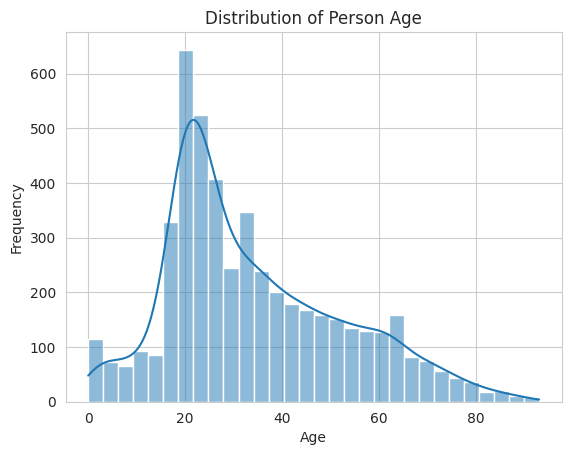

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(df_train['Person Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Since the data is not normally distributed, we'll use Median to replace the missing values.

In [45]:
median_age = df_train['Person Age'].median()
df_train['Person Age'].fillna(median_age, inplace=True)

In [46]:
df_train['Person Age'].isna().sum()

0

In [47]:
df_train['Person Alcohol Result'].isna().sum()

91

In [48]:
df_train['Person Alcohol Result'].value_counts()

,count
Person Alcohol Result,
No Data,5262
1 - POSITIVE,15
2 - NEGATIVE,8


In [49]:
df_train['Person Drug Test Result'].value_counts()

,count
Person Drug Test Result,
97 - NOT APPLICABLE,3832
No Data,1347
99 - UNKNOWN,61
1 - POSITIVE,5
2 - NEGATIVE,4


In [50]:
df_train['Person Ethnicity'].isna().sum()

0

In [51]:
df_train['Person Ethnicity'].value_counts()

,count
Person Ethnicity,
W - WHITE,2720
H - HISPANIC,1091
B - BLACK,753
99 - UNKNOWN,347
A - ASIAN,277
No Data,91
Unknown,41
I - AMER. INDIAN/ALASKAN NATIVE,35
98 - OTHER,21


In [52]:
# Merging unknown categories
df_train['Person Ethnicity'].replace({
    '99 - UNKNOWN': 'Unknown',
    'No Data': 'Unknown',
    'Unknown': 'Unknown',
    '98 - OTHER': 'Unknown'
}, inplace=True)

# Replacing 'Unknown' with the most frequent category (mode)
mode_ethnicity = df_train['Person Ethnicity'].mode()[0]
df_train['Person Ethnicity'].replace('Unknown', mode_ethnicity, inplace=True)

# One-Hot Encoding
df_train = pd.get_dummies(df_train, columns=['Person Ethnicity'], drop_first=True)

In [53]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        5376 non-null   int64  
 1   Crash ID                                          5266 non-null   float64
 2   Crash Date                                        5267 non-null   object 
 3   Crash Severity                                    5376 non-null   int64  
 4   Crash Time                                        5376 non-null   float64
 5   Nearest Trauma Center Distance                    5266 non-null   object 
 6   Time Arrived                                      5283 non-null   object 
 7   Time Notified                                     5264 non-null   object 
 8   Time Roadway Cleared                              5376 non-null   float64
 9   Autonomous Level En

In [54]:
df_train['Person Gender'].value_counts()

,count
Person Gender,
1 - MALE,2708
2 - FEMALE,2262
99 - UNKNOWN,298


In [55]:
mode_gender = df_train['Person Gender'].mode()[0]

df_train['Person Gender'].replace('99 - UNKNOWN', mode_gender, inplace=True)

df_train = pd.get_dummies(df_train, columns = ['Person Gender'], drop_first=True)

In [56]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 32 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        5376 non-null   int64  
 1   Crash ID                                          5266 non-null   float64
 2   Crash Date                                        5267 non-null   object 
 3   Crash Severity                                    5376 non-null   int64  
 4   Crash Time                                        5376 non-null   float64
 5   Nearest Trauma Center Distance                    5266 non-null   object 
 6   Time Arrived                                      5283 non-null   object 
 7   Time Notified                                     5264 non-null   object 
 8   Time Roadway Cleared                              5376 non-null   float64
 9   Autonomous Level En

In [57]:
df_train.drop(columns=[
    'Nearest Trauma Center Distance',
    'Time Arrived',
    'Time Notified',
    'Weather Condition_Unknown',
    'Crash ID',
    'Crash Date',
    'Person Alcohol Result',
    'Person Drug Test Result',
    'Time Roadway Cleared',
    'Unnamed: 0'
], inplace=True)

In [58]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Crash Severity                                    5376 non-null   int64  
 1   Crash Time                                        5376 non-null   float64
 2   Autonomous Level Engaged                          5273 non-null   object 
 3   Autonomous Unit - Reported                        5274 non-null   object 
 4   Vehicle Damage Rating 1 - Severity                5376 non-null   int64  
 5   Vehicle Model Year                                4955 non-null   float64
 6   Person Age                                        5376 non-null   float64
 7   Day_Sin                                           5376 non-null   float64
 8   Day_Cos                                           5376 non-null   float64
 9   y                  

In [59]:
df_train['Autonomous Level Engaged'].value_counts()

,count
Autonomous Level Engaged,
0 - NO AUTOMATION,4961
99 - UNKNOWN,312


In [60]:
df_train['Autonomous Unit - Reported'].value_counts()

,count
Autonomous Unit - Reported,
2 - NO,4968
99 - UNKNOWN,306


In [61]:
df_train = df_train.drop(['Autonomous Level Engaged', 'Autonomous Unit - Reported', 'Vehicle Model Year'], axis=1)

In [62]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5376 entries, 0 to 5375
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Crash Severity                                    5376 non-null   int64  
 1   Crash Time                                        5376 non-null   float64
 2   Vehicle Damage Rating 1 - Severity                5376 non-null   int64  
 3   Person Age                                        5376 non-null   float64
 4   Day_Sin                                           5376 non-null   float64
 5   Day_Cos                                           5376 non-null   float64
 6   y                                                 5376 non-null   float64
 7   Vehicle Model Year Binned_2011-2020               5376 non-null   bool   
 8   Vehicle Model Year Binned_2021-present            5376 non-null   bool   
 9   Weather Condition_2

**Test Data preprocessing**

In [63]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      928 non-null    object 
 4   Day of Week                         924 non-null    object 
 5   Nearest Trauma Center Distance      927 non-null    object 
 6   Time Arrived                        934 non-null    object 
 7   Time Notified                       930 non-null    object 
 8   Weather Condition                   948 non-null    object 
 9   Autonomous Level Engaged            929 non-null    object 
 10  Autonomous Unit - Reported          926 non-null    object 
 11  Vehicle Damage Rating 1 - Severity  928 non-n

In [64]:
df_test['Crash Severity'].value_counts()

,count
Crash Severity,
N - NOT INJURED,616
C - POSSIBLE INJURY,136
B - SUSPECTED MINOR INJURY,120
99 - UNKNOWN,27
A - SUSPECTED SERIOUS INJURY,27
K - FATAL INJURY,2


In [65]:
mapping = {
    'N - NOT INJURED': 0,
    'B - SUSPECTED MINOR INJURY': 1,
    'C - POSSIBLE INJURY': 2,
    'A - SUSPECTED SERIOUS INJURY': 3,
    'K - FATAL INJURY': 4
}
df_test['Crash Severity'].replace('99 - UNKNOWN', pd.NA, inplace=True)

df_test['Crash Severity'].isna().sum()

47

In [66]:
# Imputing missing values with mode (most common severity)
most_common = df_test['Crash Severity'].mode()[0]
df_test['Crash Severity'].fillna(most_common, inplace=True)

In [67]:
df_test['Crash Severity'] = df_test['Crash Severity'].map(mapping)

In [68]:
df_test['Crash Severity'].value_counts()

,count
Crash Severity,
0,663
2,136
1,120
3,27
4,2


In [69]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      948 non-null    int64  
 4   Day of Week                         924 non-null    object 
 5   Nearest Trauma Center Distance      927 non-null    object 
 6   Time Arrived                        934 non-null    object 
 7   Time Notified                       930 non-null    object 
 8   Weather Condition                   948 non-null    object 
 9   Autonomous Level Engaged            929 non-null    object 
 10  Autonomous Unit - Reported          926 non-null    object 
 11  Vehicle Damage Rating 1 - Severity  928 non-n

In [70]:
df_test['Day of Week'].value_counts()

,count
Day of Week,
FRIDAY,154
THURSDAY,153
MONDAY,151
WEDNESDAY,135
TUESDAY,129
SATURDAY,112
SUNDAY,90


In [71]:
df_test['Day of Week'].fillna('FRIDAY', inplace=True)

In [72]:
df_test['Day of Week'].isna().sum()

0

In [73]:
import numpy as np

# Mapping days to numbers (Monday = 0, ..., Sunday = 6)
day_mapping_1 = {
    'MONDAY': 0, 'TUESDAY': 1, 'WEDNESDAY': 2, 'THURSDAY': 3,
    'FRIDAY': 4, 'SATURDAY': 5, 'SUNDAY': 6
}

# Applying mapping
df_test['Day of Week Num'] = df_test['Day of Week'].map(day_mapping_1)

# Applying sine and cosine transformation
df_test['Day_Sin'] = np.sin(2 * np.pi * df_test['Day of Week Num'] / 7)
df_test['Day_Cos'] = np.cos(2 * np.pi * df_test['Day of Week Num'] / 7)

# Dropping the original "Day of Week" column
df_test.drop(columns=['Day of Week', 'Day of Week Num'], inplace=True)

In [74]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Unnamed: 0                          948 non-null    int64  
 1   Crash ID                            930 non-null    float64
 2   Crash Date                          919 non-null    object 
 3   Crash Severity                      948 non-null    int64  
 4   Nearest Trauma Center Distance      927 non-null    object 
 5   Time Arrived                        934 non-null    object 
 6   Time Notified                       930 non-null    object 
 7   Weather Condition                   948 non-null    object 
 8   Autonomous Level Engaged            929 non-null    object 
 9   Autonomous Unit - Reported          926 non-null    object 
 10  Vehicle Damage Rating 1 - Severity  928 non-null    object 
 11  Vehicle Model Year                  936 non-n

In [75]:
df_test['Nearest Trauma Center Distance'].value_counts()

#We'll drop this column since it has a lot of 'No Data' values.

,count
Nearest Trauma Center Distance,
No Data,807
5.916,5
1.058,3
2.087,3
4.489,3
...,...
4.534,1
3.902,1
0.164,1


In [76]:
df_test['Time Arrived'].value_counts()

#We'll also drop this just like we did for the test dataset because it also has a lot of 'No Data' values.

,count
Time Arrived,
No Data,794
13:39,3
20:17,3
17:43,3
16:29,3
...,...
08:16,1
19:09,1
15:35,1


In [77]:
# Making sure that 'Vehicle Model Year' and 'Person Age' are numeric, coercing errors to NaN
df_test['Vehicle Model Year'] = pd.to_numeric(df_test['Vehicle Model Year'], errors='coerce')
df_test['Person Age'] = pd.to_numeric(df_test['Person Age'], errors='coerce')

In [78]:
import pandas as pd

# Defining the bin edges for Vehicle Model Year
bins_1 = [2000, 2010, 2020, 2025]  # You can adjust this range as needed
labels_1 = ['2000-2010', '2011-2020', '2021-present']  # Labels for the bins

# Creating a new column for binned vehicle model year
df_test['Vehicle Model Year Binned'] = pd.cut(df_test['Vehicle Model Year'], bins=bins_1, labels=labels_1, right=False)

# Function to get the first mode of a series (for categorical columns)
def get_mode(series):
    return series.mode()[0] if not series.mode().empty else None

# Aggregating the data by 'Crash ID' and using the binned vehicle model year
df_aggregated_1 = df_test.groupby('Crash ID').agg({
    'Crash Severity': get_mode,  # Mode for categorical features
    'Weather Condition': get_mode,  # Mode for weather condition
    'Autonomous Level Engaged': get_mode,  # Mode for autonomous level
    'Vehicle Model Year Binned': get_mode,  # Mode for binned vehicle model years
    'Person Age': 'mean',  # Mean for age
    'Person Gender': get_mode  # Mode for gender
}).reset_index()

print(df_aggregated_1.head())


     Crash ID  Crash Severity Weather Condition Autonomous Level Engaged  \
0  19521585.0               0         1 - CLEAR        0 - NO AUTOMATION   
1  19522283.0               1         1 - CLEAR        0 - NO AUTOMATION   
2  19524604.0               0         1 - CLEAR        0 - NO AUTOMATION   
3  19524612.0               0         1 - CLEAR        0 - NO AUTOMATION   
4  19524615.0               1         1 - CLEAR        0 - NO AUTOMATION   

  Vehicle Model Year Binned  Person Age Person Gender  
0                 2000-2010        63.0    2 - FEMALE  
1                 2011-2020        31.0      1 - MALE  
2                 2000-2010        44.0      1 - MALE  
3                 2000-2010        54.0      1 - MALE  
4                 2011-2020        36.0    2 - FEMALE  


In [79]:
df_test['Vehicle Model Year Binned'].value_counts()

,count
Vehicle Model Year Binned,
2011-2020,502
2021-present,212
2000-2010,162


In [80]:
# One-Hot Encoding for 'Vehicle Model Year Binned'
df_test = pd.get_dummies(df_test, columns=['Vehicle Model Year Binned'], drop_first=True)

print(df_test.head())

   Unnamed: 0    Crash ID  Crash Date  Crash Severity  \
0           0  19896631.0  11/30/2023               0   
1           1  19568388.0   5/26/2023               0   
2           2  19675565.0   7/29/2023               0   
3           3  19636995.0    7/6/2023               0   
4           4  19605340.0   6/15/2023               0   

  Nearest Trauma Center Distance Time Arrived Time Notified Weather Condition  \
0                        No Data      No Data       No Data           6 - FOG   
1                        No Data      No Data       No Data         1 - CLEAR   
2                        No Data      No Data       No Data         1 - CLEAR   
3                        No Data      No Data       No Data         1 - CLEAR   
4                        No Data      No Data       No Data         1 - CLEAR   

  Autonomous Level Engaged Autonomous Unit - Reported  \
0        0 - NO AUTOMATION                     2 - NO   
1        0 - NO AUTOMATION                     2 - NO   

In [81]:
df_test['Weather Condition'].value_counts()

,count
Weather Condition,
1 - CLEAR,743
2 - CLOUDY,101
3 - RAIN,72
No Data,12
Unknown,10
99 - UNKNOWN,6
6 - FOG,3
98 - OTHER (EXPLAIN IN NARRATIVE),1


In [82]:
# Replacing 'Other' and 'No Data' values in 'Weather Condition' with mode
mode_weather_condition_1 = df_test['Weather Condition'].mode()[0]

# Replacing '98 - OTHER (EXPLAIN IN NARRATIVE)' and 'No Data' with the mode
df_test['Weather Condition'].replace(['98 - OTHER (EXPLAIN IN NARRATIVE)', 'No Data'], mode_weather_condition_1, inplace=True)

# Handling 'Unknown' values by replacing them with the mode as well
df_test['Weather Condition'].replace('99 - UNKNOWN', mode_weather_condition_1, inplace=True)

# one-hot encoding for the 'Weather Condition' column
df_test = pd.get_dummies(df_test, columns=['Weather Condition'], drop_first=True)

df_test.head()

,Unnamed: 0,Crash ID,Crash Date,Crash Severity,Nearest Trauma Center Distance,Time Arrived,Time Notified,Autonomous Level Engaged,Autonomous Unit - Reported,Vehicle Damage Rating 1 - Severity,Vehicle Model Year,Person Age,Person Alcohol Result,Person Drug Test Result,Person Ethnicity,Person Gender,Day_Sin,Day_Cos,Vehicle Model Year Binned_2011-2020,Vehicle Model Year Binned_2021-present,Weather Condition_2 - CLOUDY,Weather Condition_3 - RAIN,Weather Condition_6 - FOG,Weather Condition_Unknown
0,0,19896631.0,11/30/2023,0,No Data,No Data,No Data,0 - NO AUTOMATION,2 - NO,2 - DAMAGED 2,2010.0,19.0,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,0.433884,-0.900969,True,False,False,False,True,False
1,1,19568388.0,5/26/2023,0,No Data,No Data,No Data,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2015.0,59.0,No Data,97 - NOT APPLICABLE,W - WHITE,1 - MALE,-0.433884,-0.900969,True,False,False,False,False,False
2,2,19675565.0,7/29/2023,0,No Data,No Data,No Data,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2009.0,41.0,No Data,97 - NOT APPLICABLE,B - BLACK,2 - FEMALE,-0.974928,-0.222521,False,False,False,False,False,False
3,3,19636995.0,7/6/2023,0,No Data,No Data,No Data,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2020.0,56.0,No Data,97 - NOT APPLICABLE,W - WHITE,2 - FEMALE,0.433884,-0.900969,False,True,False,False,False,False
4,4,19605340.0,6/15/2023,0,No Data,No Data,No Data,0 - NO AUTOMATION,2 - NO,3 - DAMAGED 3,2019.0,31.0,No Data,97 - NOT APPLICABLE,B - BLACK,1 - MALE,0.433884,-0.900969,True,False,False,False,False,False


In [83]:
df_test['Weather Condition_Unknown'].value_counts()

,count
Weather Condition_Unknown,
False,938
True,10


In [84]:
df_test['Vehicle Damage Rating 1 - Severity'].value_counts()

,count
Vehicle Damage Rating 1 - Severity,
2 - DAMAGED 2,307
3 - DAMAGED 3,239
1 - DAMAGED 1 MINIMUM,206
No Data,64
4 - DAMAGED 4,62
5 - DAMAGED 5,23
0 - NO DAMAGE,20
6 - DAMAGED 6,5
7 - DAMAGED 7 HIGHEST,2


In [85]:
damage_mapping_1 = {
    '0 - NO DAMAGE': 0,
    '1 - DAMAGED 1 MINIMUM': 1,
    '2 - DAMAGED 2': 2,
    '3 - DAMAGED 3': 3,
    '4 - DAMAGED 4': 4,
    '5 - DAMAGED 5': 5,
    '6 - DAMAGED 6': 6,
    '7 - DAMAGED 7 HIGHEST': 7,
    'No Data': np.nan
}

df_test['Vehicle Damage Rating 1 - Severity'] = df_test['Vehicle Damage Rating 1 - Severity'].map(damage_mapping_1)

# Replacing NaN with the mode:
df_test['Vehicle Damage Rating 1 - Severity'].fillna(df_test['Vehicle Damage Rating 1 - Severity'].mode()[0], inplace=True)

In [86]:
df_test['Vehicle Damage Rating 1 - Severity'] = df_test['Vehicle Damage Rating 1 - Severity'].astype(int)

In [87]:
df_test['Vehicle Damage Rating 1 - Severity'].isna().sum()

0

In [88]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              948 non-null    int64  
 1   Crash ID                                930 non-null    float64
 2   Crash Date                              919 non-null    object 
 3   Crash Severity                          948 non-null    int64  
 4   Nearest Trauma Center Distance          927 non-null    object 
 5   Time Arrived                            934 non-null    object 
 6   Time Notified                           930 non-null    object 
 7   Autonomous Level Engaged                929 non-null    object 
 8   Autonomous Unit - Reported              926 non-null    object 
 9   Vehicle Damage Rating 1 - Severity      948 non-null    int64  
 10  Vehicle Model Year                      888 non-null    float6

In [89]:
df_test['Person Age'].isna().sum()

77

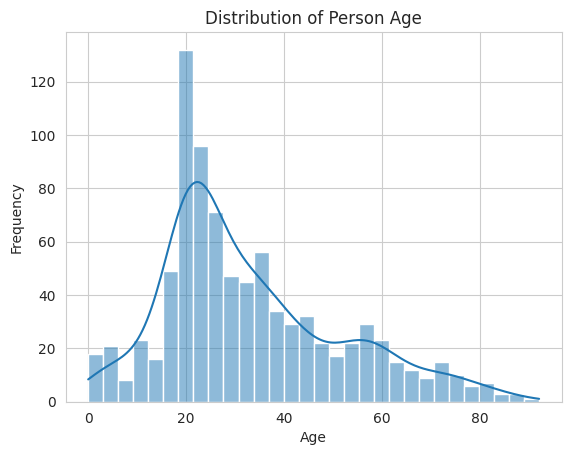

In [90]:
sns.histplot(df_test['Person Age'].dropna(), bins=30, kde=True)
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [91]:
test_median_age = df_test['Person Age'].median()
df_test['Person Age'].fillna(test_median_age, inplace=True)

In [92]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 24 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Unnamed: 0                              948 non-null    int64  
 1   Crash ID                                930 non-null    float64
 2   Crash Date                              919 non-null    object 
 3   Crash Severity                          948 non-null    int64  
 4   Nearest Trauma Center Distance          927 non-null    object 
 5   Time Arrived                            934 non-null    object 
 6   Time Notified                           930 non-null    object 
 7   Autonomous Level Engaged                929 non-null    object 
 8   Autonomous Unit - Reported              926 non-null    object 
 9   Vehicle Damage Rating 1 - Severity      948 non-null    int64  
 10  Vehicle Model Year                      888 non-null    float6

In [93]:
df_test['Person Ethnicity'].value_counts()


,count
Person Ethnicity,
W - WHITE,468
H - HISPANIC,190
B - BLACK,134
99 - UNKNOWN,64
A - ASIAN,58
No Data,15
98 - OTHER,9
Unknown,6
I - AMER. INDIAN/ALASKAN NATIVE,4


In [94]:
# Merging unknown categories
df_test['Person Ethnicity'].replace({
    '99 - UNKNOWN': 'Unknown',
    'No Data': 'Unknown',
    'Unknown': 'Unknown',
    '98 - OTHER': 'Unknown'
}, inplace=True)

# Replacing 'Unknown' with the most frequent category (mode)
mode_ethnicity_1 = df_test['Person Ethnicity'].mode()[0]
df_test['Person Ethnicity'].replace('Unknown', mode_ethnicity_1, inplace=True)

# One-Hot Encoding
df_test = pd.get_dummies(df_test, columns=['Person Ethnicity'], drop_first=True)

In [95]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        948 non-null    int64  
 1   Crash ID                                          930 non-null    float64
 2   Crash Date                                        919 non-null    object 
 3   Crash Severity                                    948 non-null    int64  
 4   Nearest Trauma Center Distance                    927 non-null    object 
 5   Time Arrived                                      934 non-null    object 
 6   Time Notified                                     930 non-null    object 
 7   Autonomous Level Engaged                          929 non-null    object 
 8   Autonomous Unit - Reported                        926 non-null    object 
 9   Vehicle Damage Rating

In [96]:
df_test['Person Gender'].value_counts()

,count
Person Gender,
1 - MALE,479
2 - FEMALE,397
99 - UNKNOWN,50


In [97]:
mode_gender_1 = df_test['Person Gender'].mode()[0]

df_test['Person Gender'].replace('99 - UNKNOWN', mode_gender_1, inplace=True)

df_test = pd.get_dummies(df_test, columns = ['Person Gender'], drop_first=True)

In [98]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 27 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Unnamed: 0                                        948 non-null    int64  
 1   Crash ID                                          930 non-null    float64
 2   Crash Date                                        919 non-null    object 
 3   Crash Severity                                    948 non-null    int64  
 4   Nearest Trauma Center Distance                    927 non-null    object 
 5   Time Arrived                                      934 non-null    object 
 6   Time Notified                                     930 non-null    object 
 7   Autonomous Level Engaged                          929 non-null    object 
 8   Autonomous Unit - Reported                        926 non-null    object 
 9   Vehicle Damage Rating

In [99]:
df_test.drop(columns=[
    'Nearest Trauma Center Distance',
    'Autonomous Level Engaged',
    'Autonomous Unit - Reported',
    'Vehicle Model Year',
    'Time Arrived',
    'Time Notified',
    'Weather Condition_Unknown',
    'Crash ID',
    'Crash Date',
    'Person Alcohol Result',
    'Person Drug Test Result',
    'Unnamed: 0'
], inplace=True)

In [100]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 15 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Crash Severity                                    948 non-null    int64  
 1   Vehicle Damage Rating 1 - Severity                948 non-null    int64  
 2   Person Age                                        948 non-null    float64
 3   Day_Sin                                           948 non-null    float64
 4   Day_Cos                                           948 non-null    float64
 5   Vehicle Model Year Binned_2011-2020               948 non-null    bool   
 6   Vehicle Model Year Binned_2021-present            948 non-null    bool   
 7   Weather Condition_2 - CLOUDY                      948 non-null    bool   
 8   Weather Condition_3 - RAIN                        948 non-null    bool   
 9   Weather Condition_6 -

In [101]:
missing_cols = set(df_train.columns) - set(df_test.columns)
extra_cols = set(df_test.columns) - set(df_train.columns)

print("Columns in train but missing in test:", missing_cols)
print("Columns in test but not in train:", extra_cols)

Columns in train but missing in test: {'y', 'Crash Time', 'Weather Condition_4 - SLEET/HAIL', 'Weather Condition_5 - SNOW'}
Columns in test but not in train: set()


In [102]:
for col in missing_cols:
    df_test[col] = 0  # Since one-hot encoded values are binary (0 or 1), set missing ones to 0

In [103]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 19 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Crash Severity                                    948 non-null    int64  
 1   Vehicle Damage Rating 1 - Severity                948 non-null    int64  
 2   Person Age                                        948 non-null    float64
 3   Day_Sin                                           948 non-null    float64
 4   Day_Cos                                           948 non-null    float64
 5   Vehicle Model Year Binned_2011-2020               948 non-null    bool   
 6   Vehicle Model Year Binned_2021-present            948 non-null    bool   
 7   Weather Condition_2 - CLOUDY                      948 non-null    bool   
 8   Weather Condition_3 - RAIN                        948 non-null    bool   
 9   Weather Condition_6 -

In [104]:
df_test.drop(['y'], axis=1, inplace=True)

In [105]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 948 entries, 0 to 947
Data columns (total 18 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Crash Severity                                    948 non-null    int64  
 1   Vehicle Damage Rating 1 - Severity                948 non-null    int64  
 2   Person Age                                        948 non-null    float64
 3   Day_Sin                                           948 non-null    float64
 4   Day_Cos                                           948 non-null    float64
 5   Vehicle Model Year Binned_2011-2020               948 non-null    bool   
 6   Vehicle Model Year Binned_2021-present            948 non-null    bool   
 7   Weather Condition_2 - CLOUDY                      948 non-null    bool   
 8   Weather Condition_3 - RAIN                        948 non-null    bool   
 9   Weather Condition_6 -

# **Model Building**

## **Regression**

In [106]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Defining features (X) and target (y)
X = df_train.drop(columns=['y'])  # Drop target variable
y = df_train['y']  # Target variable

# Splitting training data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on validation set
y_pred = model.predict(X_val)

# Model performance evaluation
mae = mean_absolute_error(y_val, y_pred)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
r2 = r2_score(y_val, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R² Score: {r2}")

Mean Absolute Error: 54.55285670076912
Root Mean Squared Error: 132.0768074408594
R² Score: 0.03188388807030962


Since the Linear regression model is not able to understand the patterns properly and delivering an accuracy of 0.03, we'll try Random Forest Regressor. Let's see how it performs...

## **Random Forest Regressor**

In [107]:
from sklearn.ensemble import RandomForestRegressor

# Initializing the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Model training
rf_model.fit(X_train, y_train)

# Prediction on validation set
y_pred_rf = rf_model.predict(X_val)

# Model evaluation
mae_rf = mean_absolute_error(y_val, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_val, y_pred_rf))
r2_rf = r2_score(y_val, y_pred_rf)

print(f"Random Forest - MAE: {mae_rf}")
print(f"Random Forest - RMSE: {rmse_rf}")
print(f"Random Forest - R² Score: {r2_rf}")

Random Forest - MAE: 29.241960037174724
Random Forest - RMSE: 61.77224076364764
Random Forest - R² Score: 0.7882316593257636


This is a huge improvement comparing with the Linear Regression model. Let's see if we can use Hyperparameter tuning to extract even better results.

## **Hyperparameter Tuning**

In [108]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_tuned = RandomizedSearchCV(RandomForestRegressor(random_state=42),
                              param_grid, n_iter=10, cv=3, n_jobs=-1)
rf_tuned.fit(X_train, y_train)

print("Best Parameters:", rf_tuned.best_params_)

Best Parameters: {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 10}


In [109]:
# Defining feature columns (excluding 'y' which is the target in training data)
feature_cols = [col for col in df_train.columns if col != 'y']

# Extracting features
X_train = df_train[feature_cols]
y_train = df_train['y']  # Our Target

X_test = df_test[feature_cols]  # Ensuring test also has the same features


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Training model with best params
rf_best = RandomForestRegressor(n_estimators=100,
                                max_depth=10,
                                min_samples_split=2,
                                min_samples_leaf=2,
                                random_state=42)
rf_best.fit(X_train, y_train)

# Making Predictions
y_train_pred = rf_best.predict(X_train)
y_test_pred = rf_best.predict(X_test)

# Evaluation Function
def evaluate_model(y_true, y_pred, dataset_name="Dataset"):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    print(f" {dataset_name} - MAE: {mae:.4f}, RMSE: {rmse:.4f}, R² Score: {r2:.4f}")

# Evaluate
evaluate_model(y_train, y_train_pred, "Training Set")
# We can't evaluate test set without true y values, so we only print predictions
print("\n First 10 Predictions on Test Set:", y_test_pred[:10])

 Training Set - MAE: 29.8290, RMSE: 59.7462, R² Score: 0.8492

 First 10 Predictions on Test Set: [253.27977168 260.28087259 284.35511977 262.12932851 256.89279795
 258.51553929 262.64661461 277.47515858 283.83413752 249.10891308]


We achieved an R² value of 0.84, which is quite high than out initial regression model's performance.